In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import time

In [2]:
# Capture Video
capture = cv2.VideoCapture("C:/Users/vsuch/Downloads/AI Assignment video.mp4")
width=int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=int(capture.get(cv2.CAP_PROP_FPS))

#To write video

#writer=cv2.VideoWriter('ball.mp4',cv2.VideoWriter_fourcc(*'DIVX'),30,(width,height))
writer=cv2.VideoWriter('ball.avi',cv2.VideoWriter_fourcc(*'MPEG'),30,(width,height))

In [3]:
fps

30

(1080, 1920, 3)

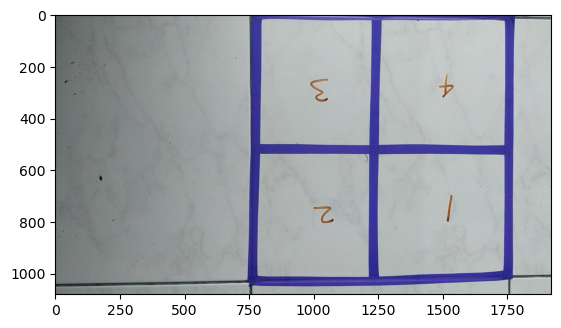

In [4]:
#Testing
nan,frame_instance = capture.read()
plt.imshow(frame_instance)
np.shape(frame_instance)


In [5]:
# Not to execute this cell
#Trials for different frames. It captures the nth frame 
#capture.set(cv2.CAP_PROP_POS_FRAMES, 405)
#nan,frame_nth=capture.read()
#cv2.imshow('frame_nth',frame_nth)
#plt.imshow(frame_nth)

In [6]:
timestamps_list=[]
quadrants=['Quadrant 1','Quadrant 2','Quadrant 3','Quadrant 4']
#latest
Yellow_hsv_min=np.array([16,87, 19],np.uint8)
Yellow_hsv_max=np.array([26, 255, 255],np.uint8)

#Orange color
Orange_hsv_min=np.array([0, 36, 145],np.uint8)
Orange_hsv_max=np.array([12,255,255],np.uint8)
    
#Green color
Green_hsv_min = np.array([73, 62, 0],np.uint8)
Green_hsv_max = np.array([94, 254,255],np.uint8)
    
#White color
White_hsv_min = np.array([20, 15, 152],np.uint8)
White_hsv_max = np.array([68, 112,255],np.uint8)  
#we store color of the ball and timestamps
Color_list=[]
timestamps_list=[]
#Store quadrant number at the time of detection
Quadrant=[]
#These are to be accessed by for loop in the next cell
Color_masks=[Yellow_hsv_min,Yellow_hsv_max,Orange_hsv_min,Orange_hsv_max,Green_hsv_min,Green_hsv_max,White_hsv_min,White_hsv_max]
Color=['Yellow','Yellow','Orange','Orange','Green','Green','White','White']


In [7]:
len(Color_masks)

8

In [8]:
#Actual execution
import imutils
while (1):
    nan,frame_instance = capture.read()
    if nan:
    #As Target object (Red Frame ROI) is fixed, taking advantage of this, im hard cropping the image for Region of Interest (abstract level)
        cropped_image=frame_instance[0:1080,750:1800]
        #Now Im dividing each frame into four quadrants
        h, w, rgb = cropped_image.shape
        #Into Columns
        half = w//2
        left_crop = cropped_image[:, :half]
        right_crop = cropped_image[:, half:]
        h1, w1, rgb = right_crop.shape
        h2, w2, rgb = left_crop.shape
    #Now dividing into Quadrants
        half2 = h1//2
        half3 = h2//2 
        Quadrant_4 = right_crop[:half2, :]
        Quadrant_1 = right_crop[half2:, :]
        Quadrant_3 = left_crop[:half3, :]
        Quadrant_2 = left_crop[half3:, :]
        Quadrants=[Quadrant_1,Quadrant_2,Quadrant_3,Quadrant_4]
        #Mask each quadrant for the color of the ball and check for its presence using Hough circles
        #convert to hsv
        #Mask quadrant 1 with different color masks
        #As I was etting more details, blurring with gaussian mask
        for i in range(0,4):
            hsv_q = cv2.cvtColor(Quadrants[i], cv2.COLOR_BGR2HSV)
            for j in range(0,8,2):
                #Apply color mask
                mask_q = cv2.inRange(hsv_q, Color_masks[j], Color_masks[j+1])
                #the resultant image will be the color of ball with color mask if true
                 #Apply erosion and dilation
                mask_q = cv2.erode(mask_q, None, iterations=4)
                mask_q = cv2.dilate(mask_q, None, iterations=2)
                #Resultant_image = cv2.bitwise_and(Quadrants[i], Quadrants[i], mask = mask_q)
                #Now, we find the circle if the resultant image after mask is having the ball
                #To find Hough circles convert to gray
                #gray_image = cv2.cvtColor(Resultant_image,cv2.COLOR_BGR2GRAY)
                #gray_image = cv2.cvtColor(mask_q,cv2.COLOR_BGR2GRAY)
                #gray_image = cv2.medianBlur(gray_image,5)
                #rows = gray_image.shape[0]
                # if circle is true, then the color and its timestamp is stored
                #circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1, rows / 8,param1=100, param2=30,minRadius=0, maxRadius=0)
                #circles = cv2.HoughCircles(gray_image, cv2.HOUGH_GRADIENT, 1, rows,param1=1, param2=10,minRadius=10, maxRadius=500)
                #circles=cv2.HoughCircles(gray_image,cv2.HOUGH_GRADIENT, 2, 32.0, 1, 4)
                countours=cv2.findContours(mask_q.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
                countours=imutils.grab_contours(countours)
            
                #if np.shape(circles):
                #x=np.ravel(circles[0])
                if len(countours)>0:
                #if x[2]>30:
                #print("Ball is Orange in color")
                    c_max = max(countours, key=cv2.contourArea)
                    (x, y), radius = cv2.minEnclosingCircle(c_max)
                    print(i,j,radius)
                    cv2.circle(Quadrants[i], (int(x), int(y)), int(radius),(0, 255, 0), 5)
                    if radius>30:
                    #print("Ball is Blue in color")
                        x=int(capture.get(cv2.CAP_PROP_POS_MSEC)/1000)
                        timestamps_list.append(x)
                        Color_list.append(Color[j])
                        Quadrant.append(i+1)
                        cv2.putText(Quadrants[i],text=Color[j],org=(int(x),int(y)),fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale=1,color=(255,255,0),thickness=3,lineType=cv2.LINE_AA)
                        cv2.putText(Quadrants[i],text=str(x),org=(int(x+20),int(y+20)),fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale=1,color=(255,0,255),thickness=3,lineType=cv2.LINE_AA)
                        cv2.putText(Quadrants[i],text=quadrants[i],org=(int(x+40),int(y+40)),fontFace=cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,fontScale=1,color=(0,255,255),thickness=3,lineType=cv2.LINE_AA)
    #Attach_image_h=np.hstack((Quadrant_2,Quadrant_1))
    #Attach_image_h_=np.hstack((Quadrant_3,Quadrant_4))
    #Attach_image_v=np.vstack((Attach_image_h_,Attach_image_h))
    writer.write(frame_instance)
    time.sleep(1/20)
    cv2.imshow("Frame", frame_instance)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
#destroys all window
cv2.destroyAllWindows()
writer.release()
capture.release()

2 2 6.041623115539551
2 2 7.7782745361328125
3 2 4.609872341156006
2 2 6.041623115539551
2 2 5.147915363311768
2 2 4.301262855529785
2 2 4.301262855529785
2 2 6.96429443359375
2 2 6.041623115539551
2 2 8.860122680664062
2 2 6.041623115539551
3 2 6.5193023681640625
3 2 3.5356338024139404
2 2 8.860122680664062
2 2 3.5356338024139404
3 2 6.041623115539551
2 2 3.5356338024139404
2 2 4.717090606689453
2 2 5.147915363311768
2 2 3.5356338024139404
2 2 9.013978004455566
3 2 4.301262855529785
3 2 7.106435298919678
3 2 3.5356338024139404
2 2 5.147915363311768
3 2 3.5356338024139404
2 2 12.020915031433105
3 2 3.5356338024139404
2 2 14.166436195373535
2 2 23.5638427734375
3 2 13.647443771362305
2 2 9.823541641235352
2 2 14.23034954071045
2 2 5.700977325439453
2 2 3.9052248001098633
2 2 3.5356338024139404
1 2 5.147915363311768
1 2 2.8285269737243652
1 2 4.301262855529785
1 2 4.301262855529785
2 2 4.743516445159912
2 2 4.743516445159912
2 2 4.743516445159912
2 2 5.147915363311768
0 0 74.259506225585

1 6 51.22997283935547
2 0 68.9046401977539
2 2 6.041623115539551
1 6 51.49040222167969
2 0 68.85275268554688
2 2 6.36406135559082
1 2 3.201662063598633
1 6 52.77556610107422
2 0 68.80797576904297
2 2 3.5356338024139404
1 6 52.88251495361328
2 0 68.06571197509766
2 2 3.8079864978790283
1 6 50.81840133666992
2 0 68.06450653076172
3 2 5.700977325439453
1 6 47.90886688232422
2 0 68.74542236328125
1 6 47.3208122253418
2 0 68.62612915039062
2 2 4.031229019165039
1 6 51.65762710571289
2 0 67.83267974853516
2 2 5.700977325439453
1 6 50.36129379272461
2 0 68.07292175292969
2 2 4.924529075622559
1 6 52.13933563232422
2 0 67.47792053222656
1 6 53.05195999145508
2 0 68.1070556640625
1 6 54.37380599975586
2 0 68.1070556640625
2 2 12.747649192810059
1 6 52.654632568359375
2 0 68.10663604736328
2 2 10.511998176574707
2 6 5.590270042419434
1 6 49.86491775512695
2 0 67.68830108642578
2 2 4.301262855529785
1 2 3.5356338024139404
1 6 49.64131164550781
2 0 67.95205688476562
2 2 6.041623115539551
1 2 3.535

1 6 52.57149124145508
2 0 68.13616180419922
2 6 3.5356338024139404
3 2 3.201662063598633
3 4 62.72934341430664
1 6 53.07187271118164
2 0 67.56375885009766
2 6 3.5356338024139404
3 2 2.8285269737243652
3 4 57.61996841430664
1 6 51.34946823120117
2 0 68.4648208618164
3 2 3.201662063598633
3 4 54.85416030883789
1 6 50.53913879394531
2 0 68.28260040283203
2 2 4.301262855529785
3 2 3.201662063598633
3 4 53.934974670410156
1 2 5.147915363311768
1 6 52.004905700683594
2 0 68.51958465576172
2 2 6.041623115539551
3 2 4.472236156463623
3 4 56.40632629394531
1 2 5.700977325439453
1 6 52.55958938598633
2 0 67.8338394165039
2 2 7.905794143676758
3 2 6.5193023681640625
3 4 59.23862075805664
0 6 3.5356338024139404
1 2 5.4084272384643555
1 6 35.107078552246094
2 0 69.3630599975586
2 2 8.631438255310059
3 2 8.500100135803223
3 4 65.56304931640625
0 6 3.201662063598633
1 6 35.556392669677734
2 0 67.53302764892578
3 2 8.746527671813965
3 4 65.34494018554688
1 6 35.556392669677734
2 0 67.84107208251953
3 

0 2 27.829938888549805
1 6 48.13677978515625
2 0 67.51630401611328
2 2 5.700977325439453
2 6 3.5356338024139404
3 2 4.301262855529785
3 4 65.68495178222656
0 2 27.829938888549805
0 6 3.5356338024139404
1 6 48.529808044433594
2 0 68.1070556640625
2 6 2.8285269737243652
3 4 65.7001724243164
0 2 30.041736602783203
1 6 47.4369010925293
2 0 67.83998107910156
2 6 2.8285269737243652
3 4 65.65487670898438
0 2 31.84739112854004
1 6 46.596771240234375
2 0 68.53024291992188
2 6 3.201662063598633
3 4 65.65487670898438
0 2 45.43891143798828
1 6 55.26763153076172
2 0 68.52928924560547
3 4 64.84579467773438
0 2 45.61815643310547
1 6 55.26763153076172
2 0 68.12062072753906
2 2 4.743516445159912
3 4 65.34915924072266
0 2 47.02242660522461
1 6 53.770442962646484
2 0 68.305419921875
2 2 5.700977325439453
2 6 4.242740631103516
3 4 65.70074462890625
0 2 45.95219039916992
1 6 54.500099182128906
2 0 68.16548919677734
2 2 2.9155757427215576
2 6 4.031229019165039
3 4 65.68495178222656
0 2 44.526397705078125
1 

0 2 55.2744140625
0 6 3.6056511402130127
1 6 49.54301071166992
2 0 68.49024200439453
2 2 6.041623115539551
2 6 28.147035598754883
3 4 65.15341186523438
0 2 56.394981384277344
1 6 49.54301071166992
2 0 68.49738311767578
2 2 6.041623115539551
2 6 10.30786418914795
3 4 65.9830551147461
0 2 55.27539825439453
1 6 49.42934036254883
2 0 68.71517944335938
2 2 8.860122680664062
2 6 10.12432861328125
3 4 66.54707336425781
0 2 55.16824722290039
1 6 49.42934036254883
2 0 68.0793228149414
2 2 8.860122680664062
2 6 6.36406135559082
3 4 66.8001708984375
0 2 56.30729293823242
0 6 3.9052248001098633
1 6 49.42934036254883
2 0 68.43547058105469
2 6 6.726912021636963
3 4 65.43174743652344
0 2 54.585628509521484
1 2 5.147915363311768
1 6 48.86420440673828
2 0 67.6195068359375
2 6 14.080227851867676
3 4 64.94548797607422
0 2 54.40049362182617
1 6 48.15510940551758
2 0 67.94033813476562
2 2 7.106435298919678
2 6 14.080227851867676
3 4 65.9928207397461
0 2 56.890342712402344
0 6 5.147915363311768
1 6 48.15510

0 2 56.49101257324219
0 6 5.147915363311768
1 2 6.041623115539551
2 0 68.9524154663086
2 2 6.020897388458252
2 6 5.700977325439453
3 4 66.21104431152344
0 2 56.13351058959961
0 6 3.5356338024139404
1 2 6.96429443359375
2 0 69.12151336669922
2 6 8.860122680664062
3 4 66.46249389648438
0 2 53.493499755859375
0 6 3.201662063598633
1 2 7.382511615753174
2 0 67.91548919677734
2 2 4.301262855529785
2 6 5.315173149108887
3 4 65.34915924072266
0 2 56.579689025878906
2 0 68.86002349853516
2 2 7.648629188537598
2 6 4.301262855529785
3 2 5.700977325439453
3 4 65.614501953125
0 2 57.135902404785156
2 0 67.7562484741211
2 2 4.924529075622559
2 6 4.301262855529785
3 4 68.26428985595703
0 2 56.075992584228516
2 0 68.24705505371094
2 2 7.7782745361328125
2 6 3.5356338024139404
3 4 65.882568359375
0 2 54.89558792114258
0 6 6.726912021636963
2 0 67.90821838378906
2 2 8.349823951721191
2 6 4.301262855529785
3 4 66.0038833618164
0 2 54.786136627197266
0 6 7.905794143676758
2 0 67.9298095703125
2 2 7.10643

0 2 54.542999267578125
0 6 14.603181838989258
2 0 68.00070190429688
2 2 4.301262855529785
2 6 3.5356338024139404
0 2 53.73562240600586
0 6 8.329621315002441
2 0 68.3193130493164
2 2 7.43313455581665
2 6 8.860122680664062
0 2 52.77956771850586
0 6 18.560810089111328
2 0 67.68639373779297
2 2 7.43313455581665
2 6 8.860122680664062
0 2 55.240970611572266
0 6 3.9052248001098633
2 0 67.58575439453125
2 6 9.823541641235352
0 2 55.387542724609375
0 6 3.9052248001098633
2 0 67.31525421142578
2 6 9.823541641235352
0 2 55.62066650390625
0 6 13.729630470275879
2 0 67.74403381347656
0 2 57.64455795288086
0 6 13.946425437927246
2 0 67.67902374267578
2 2 8.746527671813965
0 2 54.725486755371094
0 6 11.412812232971191
2 0 67.50260162353516
0 2 54.36779022216797
0 6 11.629803657531738
2 0 68.06795501708984
2 2 3.201662063598633
2 6 10.12432861328125
0 2 55.43092346191406
0 6 7.43313455581665
2 0 68.04789733886719
2 2 6.041623115539551
2 6 4.301262855529785
0 2 55.240970611572266
0 6 6.500100135803223


0 6 3.9052248001098633
2 0 67.9441146850586
3 2 7.106435298919678
3 6 30.617887496948242
0 6 3.201662063598633
2 0 67.957763671875
2 2 6.5193023681640625
2 6 3.201662063598633
3 6 29.231931686401367
2 0 67.957763671875
2 2 7.106435298919678
2 6 3.201662063598633
3 6 26.851911544799805
2 0 67.99163818359375
2 2 7.7782745361328125
2 6 2.8285269737243652
3 6 20.82832908630371
2 0 67.7828369140625
2 6 5.700977325439453
3 6 22.29920196533203
1 2 5.147915363311768
2 0 67.92979431152344
2 6 5.4084272384643555
3 6 11.884963989257812
2 0 67.92979431152344
2 2 4.272101879119873
2 6 9.013978004455566
3 6 7.615873336791992
2 0 67.92979431152344
2 2 6.041623115539551
2 6 5.4084272384643555
3 6 7.632268905639648
2 0 67.92979431152344
2 6 3.9052248001098633
3 6 20.74256706237793
2 0 67.92979431152344
2 6 5.000100135803223
3 2 4.301262855529785
3 6 20.500099182128906
0 6 6.5193023681640625
2 0 67.57173919677734
3 6 20.267921447753906
2 0 67.57413482666016
2 6 2.8285269737243652
3 6 20.554903030395508


1 2 23.964069366455078
2 0 68.85838317871094
2 6 5.147915363311768
3 6 47.600154876708984
1 2 24.653413772583008
2 0 67.95796966552734
2 2 6.96429443359375
2 6 6.96429443359375
3 6 52.76845932006836
1 2 24.521228790283203
2 0 69.56432342529297
2 2 6.041623115539551
2 6 5.700977325439453
3 6 48.86982345581055
1 2 24.842716217041016
2 0 69.18062591552734
2 2 10.79361629486084
2 6 5.700977325439453
3 6 52.76845932006836
1 2 23.823827743530273
2 0 68.45156860351562
2 2 5.147915363311768
3 6 34.4393424987793
1 2 23.286361694335938
2 0 68.53226470947266
2 2 5.147915363311768
2 6 3.5356338024139404
3 6 34.4393424987793
1 2 23.822595596313477
2 0 67.5401840209961
2 2 4.301262855529785
2 6 3.5356338024139404
3 6 34.4393424987793
1 2 26.24890899658203
2 0 68.3996353149414
2 2 4.301262855529785
2 6 3.5356338024139404
3 6 34.03871154785156
1 2 30.041736602783203
2 0 67.98992919921875
2 2 4.301262855529785
2 6 3.5356338024139404
3 6 30.6663761138916
1 2 34.6439208984375
2 0 68.04888153076172
2 2 4.

0 6 7.43313455581665
1 2 50.125816345214844
2 0 68.36325073242188
2 6 2.8285269737243652
3 6 33.32051467895508
1 2 50.05706024169922
2 0 68.19900512695312
2 2 3.5356338024139404
2 6 2.8285269737243652
3 6 25.484907150268555
1 2 49.98552703857422
2 0 68.36325073242188
2 6 3.5356338024139404
3 2 13.82941722869873
3 6 26.315494537353516
1 2 49.428104400634766
1 6 3.201662063598633
2 0 69.20732879638672
2 2 14.705541610717773
2 6 9.823541641235352
3 6 31.325010299682617
1 2 48.646785736083984
2 0 69.20732879638672
2 2 9.34087085723877
2 6 3.5356338024139404
3 6 33.32173156738281
0 6 3.201662063598633
1 2 49.656158447265625
1 6 12.020915031433105
2 0 70.92528533935547
2 2 12.971221923828125
2 6 6.96429443359375
3 6 33.32051467895508
0 6 3.201662063598633
1 2 50.55608367919922
1 6 3.5356338024139404
2 0 69.45679473876953
2 2 4.94984769821167
2 6 6.041623115539551
3 6 33.53369903564453
1 2 49.70457077026367
1 6 4.301262855529785
2 0 63.799034118652344
2 2 6.103377819061279
3 6 32.962200164794

0 4 54.71316909790039
1 2 50.09893035888672
2 2 9.300638198852539
3 6 31.64263343811035
0 4 52.14006423950195
1 2 50.09893035888672
1 4 50.79872131347656
2 2 4.301262855529785
3 6 33.12042236328125
0 4 23.086891174316406
1 2 49.46532440185547
1 4 50.16081237792969
1 6 5.700977325439453
2 2 4.301262855529785
2 4 7.677906036376953
3 2 19.557706832885742
3 6 35.77980041503906
1 2 49.160301208496094
1 4 43.07271194458008
1 6 12.747649192810059
2 2 5.147915363311768
2 4 49.635128021240234
3 6 34.88920974731445
1 2 50.460384368896484
1 6 8.846003532409668
2 2 4.301262855529785
2 4 50.4389533996582
3 6 34.88920974731445
1 2 51.88370132446289
1 6 9.962529182434082
2 4 50.09360122680664
3 6 35.30902099609375
1 2 51.21275329589844
1 6 10.12432861328125
2 2 3.201662063598633
2 4 51.62087631225586
3 6 32.942344665527344
1 2 50.78657150268555
1 6 7.7782745361328125
2 4 49.840389251708984
3 6 33.048221588134766
1 2 48.77377700805664
1 6 5.147915363311768
2 4 49.48059844970703
3 6 32.942344665527344


0 0 68.8840560913086
0 6 6.726912021636963
1 2 49.70902633666992
2 2 7.106435298919678
2 4 67.03363037109375
3 6 31.468725204467773
0 0 71.81919860839844
0 6 31.21708106994629
1 2 50.091102600097656
2 2 5.700977325439453
2 4 67.53712463378906
3 6 29.95423126220703
0 0 73.5519790649414
0 6 36.22509002685547
1 2 50.10591506958008
2 4 67.89683532714844
3 6 31.862403869628906
0 0 72.73445129394531
0 6 30.207714080810547
1 2 50.091102600097656
2 4 68.48461151123047
3 6 31.862403869628906
0 0 70.28527069091797
0 2 5.831051826477051
0 6 16.324926376342773
1 2 49.427818298339844
2 2 5.700977325439453
2 4 66.69161224365234
3 6 28.024045944213867
0 0 69.62446594238281
0 2 10.404426574707031
0 6 13.124505043029785
1 2 50.025150299072266
2 2 7.222939968109131
2 4 66.89874267578125
3 6 28.065935134887695
0 0 68.76888275146484
0 2 11.662003517150879
0 6 13.793214797973633
1 2 50.025150299072266
2 2 7.998806476593018
2 4 66.73870086669922
3 6 28.024045944213867
0 0 68.9284439086914
0 2 13.20047855377

0 0 66.9828872680664
0 6 16.101341247558594
1 2 50.050411224365234
2 4 65.68495178222656
3 6 45.79903030395508
0 0 67.33919525146484
0 6 15.59743881225586
1 2 50.236480712890625
1 6 2.8285269737243652
2 2 2.9155757427215576
2 4 66.72715759277344
3 6 42.985694885253906
0 0 67.3042984008789
0 6 14.916534423828125
1 2 49.92186737060547
2 4 68.32652282714844
3 6 43.2007942199707
0 0 67.33302307128906
0 6 17.7342472076416
1 2 50.15955352783203
2 4 67.00923919677734
3 6 46.197731018066406
0 0 67.33247375488281
0 6 17.7342472076416
1 2 50.13456726074219
2 4 67.54637908935547
3 6 46.197731018066406
0 0 67.74189758300781
0 6 12.379518508911133
1 2 50.72482681274414
2 2 4.924529075622559
2 4 66.20767974853516
3 6 28.313072204589844
0 0 67.2384033203125
0 6 19.006677627563477
1 2 50.06547546386719
2 2 6.5193023681640625
2 4 67.81233978271484
3 6 31.953189849853516
0 0 67.37291717529297
0 6 28.04024887084961
1 2 50.07466125488281
2 4 67.95780944824219
3 6 28.570188522338867
0 0 67.24605560302734
0

0 0 67.68395233154297
0 6 26.315494537353516
1 2 49.78554153442383
2 2 5.147915363311768
2 4 68.12654113769531
3 6 48.86982345581055
0 0 67.71040344238281
0 6 22.902063369750977
1 2 49.80239486694336
2 2 4.94984769821167
2 4 68.1213150024414
3 6 52.99538040161133
0 0 67.6044921875
0 6 19.300357818603516
1 2 49.7132682800293
2 2 15.182326316833496
2 4 68.12606811523438
3 6 48.86982345581055
0 0 67.43521881103516
0 6 22.86900520324707
1 2 50.091102600097656
2 2 12.103818893432617
2 4 66.73268127441406
3 6 31.04844856262207
0 0 67.5168685913086
0 6 24.789600372314453
1 2 49.79793167114258
2 4 67.26264190673828
3 6 46.33617401123047
0 0 67.30908966064453
0 6 26.661802291870117
1 2 49.79793167114258
2 2 7.7782745361328125
2 4 66.85067749023438
3 6 29.12053871154785
0 0 66.88968658447266
0 6 26.661802291870117
1 2 49.69059371948242
2 4 66.85067749023438
3 6 25.739173889160156
0 0 66.9608154296875
0 6 25.77971649169922
1 2 49.744346618652344
2 4 66.85067749023438
3 2 6.5193023681640625
3 6 27

0 0 67.22998809814453
0 6 30.10408592224121
1 2 23.8533935546875
2 2 10.511998176574707
2 4 66.14016723632812
3 6 33.81208038330078
0 0 67.29839324951172
0 6 33.30175018310547
2 2 6.5193023681640625
2 4 66.72715759277344
3 6 53.74486541748047
0 0 67.50326538085938
0 6 34.82107162475586
2 2 10.12432861328125
2 4 66.01671600341797
3 6 53.74486541748047
0 0 67.59893798828125
0 6 34.83135223388672
2 4 66.20352172851562
3 2 4.743516445159912
3 6 53.967681884765625
0 0 67.5576171875
0 6 22.19843292236328
2 2 5.147915363311768
2 4 66.53079986572266
3 6 53.48140335083008
0 0 67.56221771240234
0 6 15.890348434448242
1 2 6.5193023681640625
2 4 66.53079986572266
3 6 53.48140335083008
0 0 67.56221771240234
0 6 18.875591278076172
2 4 66.2905044555664
3 6 54.341609954833984
0 0 67.56221771240234
0 6 23.119356155395508
2 4 66.58003234863281
3 6 53.967681884765625
0 0 67.55754852294922
0 6 23.307823181152344
2 4 66.54948425292969
3 6 53.48140335083008
0 0 67.55754852294922
0 6 23.119356155395508
2 4 6

2 2 7.632268905639648
2 4 67.84468841552734
3 6 33.8203010559082
2 4 68.10663604736328
3 6 29.517044067382812
2 2 6.5193023681640625
2 4 68.10663604736328
3 6 44.062923431396484
2 4 67.57675170898438
3 6 46.34954833984375
2 4 67.57675170898438
3 6 53.366756439208984
2 4 67.57675170898438
3 6 30.25249671936035
2 2 7.7782745361328125
2 4 67.86915588378906
3 6 30.220125198364258
2 2 7.106435298919678
2 4 67.86915588378906
3 2 5.852449893951416
3 6 30.220125198364258
2 2 7.7782745361328125
2 4 67.12640380859375
3 6 32.91728973388672
2 2 9.12424373626709
2 4 68.10663604736328
3 6 32.91728973388672
2 2 4.717090606689453
2 4 68.10663604736328
3 6 32.24913024902344
2 4 67.82129669189453
3 6 47.14461135864258
2 2 4.301262855529785
2 4 67.26516723632812
3 6 30.96088409423828
2 2 5.700977325439453
2 4 66.72715759277344
3 6 52.37614440917969
2 4 66.7275390625
3 6 52.844207763671875
2 4 67.26516723632812
3 6 30.735088348388672
2 2 6.670932292938232
2 4 66.72715759277344
3 6 30.41175079345703
2 2 6.

2 0 66.51177978515625
2 2 6.36406135559082
3 6 33.854652404785156
2 0 68.69505310058594
2 2 6.103377819061279
3 6 33.18046951293945
2 0 64.71607208251953
2 2 6.103377819061279
3 6 33.18046951293945
1 6 2.8285269737243652
2 0 63.825252532958984
2 2 5.700977325439453
3 6 32.97361373901367
2 0 64.72102355957031
2 2 5.700977325439453
3 6 32.97361373901367
2 0 65.4000473022461
2 2 5.700977325439453
3 6 33.18046951293945
2 0 65.85697937011719
2 2 5.700977325439453
3 6 33.18046951293945
1 6 3.201662063598633
2 0 66.13056182861328
2 2 5.700977325439453
3 6 33.18046951293945
2 0 65.97261047363281
2 2 7.106435298919678
3 6 33.18046951293945
1 6 5.315173149108887
2 0 66.27845764160156
2 2 7.382511615753174
3 6 33.18046951293945
1 6 5.315173149108887
2 0 66.24542236328125
2 2 10.12432861328125
3 6 33.18046951293945
1 6 3.201662063598633
2 0 66.62330627441406
2 2 10.12432861328125
3 6 32.97361373901367
2 0 67.2954330444336
2 2 8.062357902526855
3 6 34.239479064941406
2 0 68.47272491455078
2 2 9.604

0 2 51.646705627441406
2 0 67.86424255371094
2 2 3.5356338024139404
3 6 53.48140335083008
0 2 51.4622688293457
2 0 67.80738830566406
2 2 4.301262855529785
3 6 53.24011993408203
0 2 50.98734664916992
2 0 67.80738830566406
2 2 8.860122680664062
3 6 52.99538040161133
0 2 60.10417556762695
0 6 2.8285269737243652
2 0 68.38525390625
2 2 4.301262855529785
3 6 46.88334274291992
0 2 57.00886917114258
1 2 6.5193023681640625
2 0 67.85743713378906
2 2 4.301262855529785
3 6 37.10805130004883
0 2 53.0249137878418
2 0 67.95743560791016
2 2 4.301262855529785
3 2 4.924529075622559
3 6 37.10805130004883
0 2 52.895347595214844
0 6 4.924529075622559
2 0 67.85743713378906
2 2 4.301262855529785
3 6 37.10805130004883
0 2 51.61122512817383
0 6 5.147915363311768
2 0 67.86761474609375
2 2 4.301262855529785
3 6 46.875022888183594
0 2 50.10387420654297
0 6 5.831051826477051
2 0 67.71320343017578
2 2 4.301262855529785
3 2 5.700977325439453
3 6 46.875022888183594
0 2 51.145442962646484
0 6 3.9052248001098633
1 2 4.

0 2 55.08412551879883
0 6 6.54619026184082
2 0 67.33484649658203
2 6 2.8285269737243652
3 2 5.147915363311768
3 6 53.967681884765625
0 2 54.333953857421875
0 6 5.147915363311768
2 0 67.30236053466797
2 2 5.700977325439453
2 6 2.8285269737243652
3 2 4.924529075622559
3 6 53.967681884765625
0 2 54.34650802612305
0 6 9.962529182434082
2 0 67.38007354736328
2 2 5.700977325439453
2 6 3.201662063598633
3 2 5.147915363311768
3 6 53.967681884765625
0 2 53.97968673706055
0 6 7.615873336791992
2 0 67.04505920410156
2 2 7.905794143676758
2 6 3.201662063598633
3 6 36.678627014160156
0 2 54.00674819946289
0 6 8.276573181152344
2 0 67.38136291503906
2 2 5.700977325439453
2 6 3.201662063598633
3 2 3.201662063598633
3 6 53.967681884765625
0 2 54.033302307128906
0 6 7.159010887145996
2 0 67.54728698730469
2 2 3.5356338024139404
2 6 3.201662063598633
3 6 30.463191986083984
0 2 53.41519546508789
0 6 13.285429954528809
2 0 67.41444396972656
2 6 3.201662063598633
3 6 30.565603256225586
0 2 53.4817657470703

0 2 49.21171569824219
2 0 67.5059585571289
2 2 4.94984769821167
3 2 3.201662063598633
3 4 57.44091796875
0 2 51.123374938964844
2 0 67.13863372802734
2 6 5.700977325439453
3 2 4.472236156463623
3 4 57.36302947998047
0 2 52.44202423095703
2 0 67.50418090820312
2 2 7.7782745361328125
2 6 3.5356338024139404
3 2 10.977349281311035
3 4 55.9330940246582
0 2 52.19730758666992
2 0 67.47724914550781
2 6 3.5356338024139404
3 2 11.020638465881348
3 4 58.7253303527832
0 2 54.00680923461914
2 0 67.31465911865234
2 2 4.94984769821167
3 2 7.106435298919678
3 4 59.54188919067383
0 2 53.2888298034668
0 6 6.800835609436035
2 0 67.35716247558594
2 2 7.43313455581665
2 6 2.8285269737243652
3 2 9.013978004455566
3 4 61.459434509277344
0 2 52.909568786621094
0 6 6.726912021636963
2 0 68.8195571899414
2 2 7.7782745361328125
2 6 2.8285269737243652
3 2 12.093486785888672
3 4 64.64077758789062
0 2 53.14042282104492
0 6 6.726912021636963
2 0 67.91082763671875
2 2 4.717090606689453
2 6 5.590270042419434
3 2 12.34

0 2 56.20520782470703
0 6 9.394247055053711
2 0 67.13056945800781
2 2 7.106435298919678
2 6 4.717090606689453
3 4 68.99816131591797
0 2 53.68901824951172
0 6 7.382511615753174
2 0 67.13468170166016
2 6 4.472236156463623
3 4 68.68656921386719
0 2 53.733314514160156
0 6 6.5193023681640625
2 0 67.50284576416016
2 2 5.700977325439453
2 6 4.301262855529785
3 2 3.6401548385620117
3 4 69.73172760009766
0 2 56.11162185668945
0 6 4.94984769821167
1 2 4.301262855529785
2 0 67.50284576416016
2 6 4.031229019165039
3 4 67.37796020507812
0 2 53.627140045166016
0 6 32.128746032714844
2 0 68.3477554321289
2 2 7.106435298919678
2 6 3.201662063598633
3 2 3.201662063598633
3 4 68.8333511352539
0 2 52.410030364990234
0 6 15.953156471252441
2 0 68.25071716308594
2 2 6.36406135559082
2 6 2.8285269737243652
3 4 67.95195007324219
0 2 53.5626220703125
0 6 15.53232479095459
2 0 68.38928985595703
2 2 6.5193023681640625
2 6 3.201662063598633
3 4 68.80780029296875
0 2 51.95709991455078
0 6 19.799089431762695
2 0 6

0 2 53.9024772644043
0 6 12.747649192810059
1 2 3.9052248001098633
1 6 42.500099182128906
2 0 67.5046615600586
2 2 5.700977325439453
2 6 5.4084272384643555
3 4 66.72715759277344
0 2 53.9024772644043
0 6 14.23034954071045
1 6 56.76716613769531
2 0 68.00019836425781
2 2 5.700977325439453
2 6 4.031229019165039
3 4 66.39909362792969
0 2 54.96266555786133
0 6 24.42344856262207
1 2 6.5193023681640625
1 6 49.8122444152832
2 0 67.79463195800781
2 2 5.700977325439453
2 6 4.031229019165039
3 2 7.1470866203308105
3 4 66.92169189453125
0 2 55.01383590698242
0 6 21.691110610961914
1 2 6.041623115539551
1 6 48.76483917236328
2 0 67.65556335449219
2 2 5.147915363311768
2 6 14.57748031616211
3 4 67.05604553222656
0 2 53.89351272583008
0 6 24.42344856262207
1 2 5.147915363311768
1 6 52.14652633666992
2 0 68.74341583251953
2 2 6.726912021636963
2 6 7.500100135803223
3 2 5.147915363311768
3 4 67.65380859375
0 2 53.83774185180664
0 6 24.829517364501953
1 2 5.147915363311768
1 6 51.10783004760742
2 0 68.82

0 2 53.83774185180664
0 6 3.201662063598633
1 6 45.708412170410156
2 0 67.1906509399414
2 2 6.041623115539551
2 6 9.486932754516602
3 2 7.762187480926514
3 4 67.15104675292969
0 2 54.09492492675781
1 6 45.45886993408203
2 0 67.51020812988281
2 2 4.94984769821167
2 6 3.6056511402130127
3 4 66.46249389648438
0 2 54.09492492675781
0 6 5.700977325439453
1 6 49.23931121826172
2 0 67.5499496459961
2 2 7.382511615753174
2 6 6.265082359313965
3 4 66.47944641113281
0 2 54.09492492675781
0 6 7.159010887145996
1 6 49.56319046020508
2 0 67.39764404296875
2 2 6.5193023681640625
2 6 8.544103622436523
3 2 3.5356338024139404
3 4 66.68457794189453
0 2 54.251827239990234
0 6 6.041623115539551
1 6 49.056190490722656
2 0 67.39764404296875
2 2 4.94984769821167
3 4 66.62704467773438
0 2 55.502349853515625
0 6 7.7782745361328125
1 6 49.00265121459961
2 0 67.56330871582031
2 2 5.147915363311768
2 6 10.440406799316406
3 4 66.99449920654297
0 2 54.17112350463867
0 6 7.7782745361328125
1 6 48.76483917236328
2 0 

0 2 15.218378067016602
1 6 44.783199310302734
2 0 68.13396453857422
2 2 6.5193023681640625
2 6 5.831051826477051
3 4 65.89775085449219
1 6 48.52328872680664
2 0 68.16262817382812
2 2 3.201662063598633
2 6 5.831051826477051
3 4 68.21727752685547
1 6 49.441986083984375
2 0 68.06270599365234
2 6 5.831051826477051
3 4 66.50796508789062
1 6 48.76483917236328
2 0 68.06270599365234
2 6 5.590270042419434
3 4 66.72715759277344
1 2 4.301262855529785
1 6 49.206298828125
2 0 68.16262817382812
2 2 4.94984769821167
2 6 3.201662063598633
3 2 5.147915363311768
3 4 66.62779235839844
1 6 48.97458267211914
2 0 68.54032135009766
2 2 8.321758270263672
2 6 5.831051826477051
3 2 5.147915363311768
3 4 67.41300964355469
1 6 44.7675666809082
2 0 68.68843841552734
2 2 3.5356338024139404
2 6 9.848958015441895
3 4 67.57598114013672
1 6 46.33043670654297
2 0 68.65528869628906
2 2 5.147915363311768
2 6 4.609872341156006
3 2 5.700977325439453
3 4 67.41300964355469
1 6 46.14118576049805
2 0 67.51551055908203
2 2 6.041

2 2 9.823541641235352
2 2 5.147915363311768
2 2 4.301262855529785
3 2 3.5356338024139404
3 2 5.147915363311768
2 2 6.5193023681640625
3 2 5.147915363311768
2 2 13.285429954528809
2 2 7.106435298919678
1 2 5.147915363311768
2 2 9.300638198852539
3 2 6.041623115539551
1 2 4.301262855529785
2 2 10.12432861328125
1 2 4.301262855529785
2 2 5.700977325439453
3 2 6.626190185546875
1 2 4.301262855529785
2 2 4.301262855529785
2 2 7.905794143676758
2 2 7.382511615753174
2 2 3.5356338024139404
2 2 6.041623115539551
2 2 5.700977325439453
2 2 3.5356338024139404
2 2 3.5356338024139404
2 2 6.041623115539551
2 2 6.36406135559082
1 2 5.700977325439453
3 2 5.700977325439453
2 2 7.106435298919678
2 2 5.700977325439453
2 2 5.147915363311768
2 2 8.514793395996094
2 2 7.106435298919678
2 2 12.12057113647461
2 2 4.272101879119873
2 2 7.106435298919678
2 2 6.36406135559082
2 2 6.5193023681640625
2 2 7.106435298919678
2 2 6.36406135559082
1 2 3.5356338024139404
2 2 5.700977325439453
1 2 3.5356338024139404
2 2 

0 0 62.10082244873047
1 6 3.201662063598633
2 2 6.96429443359375
0 0 63.12299346923828
1 2 10.30786418914795
1 6 5.315173149108887
2 2 6.5193023681640625
0 0 62.900814056396484
0 6 3.5356338024139404
1 2 4.301262855529785
1 6 3.201662063598633
2 2 5.700977325439453
0 0 62.900814056396484
1 2 4.301262855529785
1 6 3.6056511402130127
0 0 61.98800277709961
1 2 3.5356338024139404
1 6 4.609872341156006
0 0 62.500099182128906
1 2 3.5356338024139404
1 6 4.031229019165039
0 0 60.25780487060547
0 6 4.301262855529785
1 6 4.031229019165039
0 0 60.25780487060547
1 6 5.147915363311768
2 2 4.301262855529785
0 0 60.913970947265625
1 6 5.4084272384643555
2 2 9.192488670349121
0 0 59.54632568359375
0 6 5.147915363311768
1 2 4.717090606689453
1 6 6.5193023681640625
2 2 7.43313455581665
0 0 60.112030029296875
2 2 6.96429443359375
0 0 60.70018005371094
0 6 2.8285269737243652
2 2 4.94984769821167
0 0 58.67292022705078
0 6 5.147915363311768
2 2 5.700977325439453
0 0 58.67292022705078
1 2 5.147915363311768
1

0 0 66.87591552734375
0 2 8.276573181152344
0 6 28.04024887084961
2 2 2.6926822662353516
2 6 47.45452880859375
3 2 5.147915363311768
0 0 66.87591552734375
0 6 30.401578903198242
1 2 5.700977325439453
1 4 33.42538833618164
2 2 5.700977325439453
2 6 50.34391784667969
3 2 5.147915363311768
0 0 66.97393798828125
0 6 19.076128005981445
1 2 4.301262855529785
1 4 37.513431549072266
2 2 5.700977325439453
2 6 51.10049057006836
3 2 3.6401548385620117
0 0 67.19764709472656
0 6 19.076128005981445
1 2 3.5356338024139404
1 4 37.047367095947266
2 2 5.700977325439453
2 6 51.10049057006836
3 2 3.6401548385620117
0 0 66.7939453125
0 6 32.20646667480469
1 2 3.5356338024139404
1 4 41.17351150512695
2 2 2.6926822662353516
2 6 50.48029327392578
3 2 3.6401548385620117
0 0 67.10365295410156
0 6 13.781441688537598
1 4 40.47848892211914
2 2 4.301262855529785
2 6 51.10049057006836
3 2 3.1623775959014893
0 0 67.36039733886719
0 6 25.34768295288086
1 4 31.18503189086914
2 2 3.5356338024139404
2 6 46.22238922119140

0 0 67.05052185058594
0 6 20.94049072265625
1 4 59.54405212402344
2 2 3.9052248001098633
2 6 32.16374206542969
0 0 67.19127655029297
0 6 20.013153076171875
1 4 60.897552490234375
2 6 32.626773834228516
0 0 66.33535766601562
0 2 50.759334564208984
0 6 15.577399253845215
1 4 59.026363372802734
2 2 10.977349281311035
2 6 32.16374206542969
0 0 66.15025329589844
0 2 53.91625213623047
0 6 14.926910400390625
1 4 59.624202728271484
2 2 7.905794143676758
2 6 32.16374206542969
3 2 34.31561279296875
0 0 67.28114318847656
0 6 52.196842193603516
1 4 59.85618209838867
2 2 5.700977325439453
2 6 17.39262580871582
3 2 44.20098876953125
0 0 67.35914611816406
0 6 29.436471939086914
1 4 60.39105987548828
2 2 6.041623115539551
2 6 30.83246421813965
3 2 42.43994903564453
0 0 68.64532470703125
0 6 39.373313903808594
1 4 59.96010971069336
2 2 4.301262855529785
2 6 18.344036102294922
3 2 42.081905364990234
0 0 68.61923217773438
0 6 31.7530517578125
1 4 59.172794342041016
2 2 4.94984769821167
2 6 32.16374206542

0 0 66.78028106689453
0 6 12.521627426147461
1 4 58.9958610534668
2 2 4.743516445159912
2 6 18.217580795288086
3 2 58.489009857177734
3 6 2.8285269737243652
0 0 66.93634033203125
0 6 10.821015357971191
1 4 58.486488342285156
2 2 11.597513198852539
2 6 18.217580795288086
3 2 57.77818298339844
3 6 4.717090606689453
0 0 66.95270538330078
0 6 11.202900886535645
1 2 7.905794143676758
1 4 58.87548828125
2 2 10.606701850891113
2 6 18.934518814086914
3 2 59.1416130065918
3 6 4.924529075622559
0 0 67.2347640991211
0 6 12.36913776397705
1 4 59.266544342041016
2 2 5.2202534675598145
2 6 29.12483024597168
3 2 58.24530792236328
3 6 5.852449893951416
0 0 67.19569396972656
0 6 20.554903030395508
1 4 59.35075378417969
2 2 6.36406135559082
2 6 18.960311889648438
3 2 56.34444808959961
3 6 4.924529075622559
0 0 67.19241333007812
0 6 20.554903030395508
1 4 58.75764465332031
2 2 9.708344459533691
2 6 20.206283569335938
3 2 55.883819580078125
0 0 66.8976058959961
0 6 17.902612686157227
1 4 58.32759475708008

0 0 67.27021789550781
0 6 21.50591278076172
1 4 59.964393615722656
2 2 6.96429443359375
2 6 51.72291946411133
3 2 55.807804107666016
3 6 10.12432861328125
0 0 67.22908020019531
0 6 21.50591278076172
1 4 60.46703338623047
2 2 5.700977325439453
2 6 51.72291946411133
3 2 55.43023681640625
3 6 9.192488670349121
0 0 67.00682067871094
0 6 19.918560028076172
1 4 57.91086959838867
2 2 3.8079864978790283
2 6 51.3079948425293
3 2 55.43023681640625
3 6 9.192488670349121
0 0 66.87979888916016
0 6 19.918560028076172
1 4 57.9985237121582
2 2 5.147915363311768
2 6 51.3079948425293
3 2 55.61709213256836
3 6 8.276573181152344
0 0 67.034912109375
0 6 30.00843048095703
1 4 58.45240783691406
2 2 7.159010887145996
2 6 51.72291946411133
3 2 56.663551330566406
3 6 8.276573181152344
0 0 67.034912109375
0 6 19.96256446838379
1 4 60.27032470703125
2 2 10.700567245483398
2 6 51.72291946411133
3 2 58.647491455078125
3 6 8.948738098144531
0 0 67.00125122070312
0 6 16.985387802124023
1 4 58.040985107421875
2 2 7.77

0 0 67.38858795166016
0 6 28.85317611694336
1 4 58.4053840637207
2 2 6.265082359313965
2 6 52.89372634887695
3 2 54.79326629638672
3 6 4.301262855529785
0 0 67.19766998291016
0 6 27.97330093383789
1 4 58.4053840637207
2 6 52.89372634887695
3 2 53.23129653930664
3 6 4.301262855529785
0 0 67.05670928955078
0 6 24.382469177246094
1 4 58.19488525390625
2 2 9.617792129516602
2 6 51.44181442260742
3 2 54.51373291015625
3 6 2.8285269737243652
0 0 66.76165008544922
0 6 24.382469177246094
1 4 58.703678131103516
2 2 4.717090606689453
2 6 52.33794403076172
3 2 54.51373291015625
3 6 4.717090606689453
0 0 66.85626983642578
0 6 15.572511672973633
1 2 8.514793395996094
1 4 58.86891555786133
2 2 7.106435298919678
2 6 52.33794403076172
3 2 54.89356231689453
3 6 4.301262855529785
0 0 66.72020721435547
0 6 15.572511672973633
1 4 59.513084411621094
2 2 5.147915363311768
2 6 52.33794403076172
3 2 54.96329116821289
3 6 6.800835609436035
0 0 66.8982162475586
0 6 6.103377819061279
1 4 59.737022399902344
2 6 5

0 2 4.301262855529785
1 4 50.437530517578125
2 2 6.5193023681640625
2 6 51.23002624511719
3 2 54.51373291015625
0 2 4.94984769821167
1 4 50.10498809814453
2 2 4.301262855529785
2 6 51.23002624511719
3 2 54.286338806152344
1 4 44.7494010925293
2 2 3.5356338024139404
2 6 32.626773834228516
3 2 54.0595817565918
1 4 45.21348190307617
2 2 6.36406135559082
2 6 33.3804817199707
3 2 55.292728424072266
3 6 7.632268905639648
1 4 48.50267791748047
2 2 5.700977325439453
2 6 43.69697570800781
3 2 54.82540512084961
3 6 7.211202621459961
1 4 47.57129669189453
2 2 4.743516445159912
2 6 43.69697570800781
3 2 54.50240707397461
3 6 7.211202621459961
1 2 8.24631118774414
1 4 15.4435453414917
2 2 5.700977325439453
2 6 43.655433654785156
3 2 55.38898849487305
3 6 7.211202621459961
2 2 5.700977325439453
2 6 43.640838623046875
3 2 55.0682373046875
3 6 9.924817085266113
2 2 3.5356338024139404
2 6 43.64067840576172
3 2 55.0682373046875
2 2 5.8400444984436035
2 6 43.64067840576172
3 2 54.50240707397461
3 6 6.020

0 2 45.22184753417969
0 2 48.99244689941406
2 2 5.147915363311768
0 2 48.44347381591797
2 2 5.147915363311768
0 2 50.56127166748047
0 2 48.420135498046875
2 2 3.3542017936706543
0 2 51.44181442260742
2 2 3.5356338024139404
0 2 50.500099182128906
2 2 14.396280288696289
0 2 50.982940673828125
2 2 6.041623115539551
0 2 50.982940673828125
2 2 5.147915363311768
0 2 51.90867233276367
2 2 4.717090606689453
0 2 53.64010238647461
2 2 4.717090606689453
0 2 52.37468338012695
2 2 4.717090606689453
0 2 52.04829788208008
0 2 54.02324295043945
2 2 4.301262855529785
0 2 53.391395568847656
2 2 4.301262855529785
0 2 53.83549499511719
2 2 7.106435298919678
3 2 5.147915363311768
0 2 54.25419998168945
2 2 5.147915363311768
0 2 53.78241729736328
2 2 4.94984769821167
0 2 54.05925369262695
2 2 10.190231323242188
3 2 4.301262855529785
0 2 53.85631561279297
0 6 6.800835609436035
2 2 5.831051826477051
0 2 54.06616973876953
0 6 11.85336971282959
2 2 5.147915363311768
0 2 54.183082580566406
0 6 6.403224468231201
2

0 2 53.785213470458984
0 6 7.071167945861816
1 6 11.769660949707031
2 2 7.648629188537598
2 6 27.8427791595459
0 2 52.90095138549805
0 6 6.041623115539551
1 6 15.890348434448242
2 2 7.648629188537598
2 6 32.46931457519531
0 2 55.1076545715332
0 6 5.700977325439453
1 6 23.048959732055664
2 2 4.743516445159912
2 6 37.15895080566406
0 2 54.606380462646484
0 6 4.717090606689453
1 2 5.315173149108887
1 6 5.758855819702148
2 2 4.743516445159912
2 6 40.48143005371094
0 2 53.26594161987305
1 2 10.511998176574707
1 6 4.242740631103516
2 2 16.568140029907227
2 6 40.54496765136719
0 2 53.52261734008789
1 2 6.800835609436035
1 6 3.5356338024139404
2 2 4.272101879119873
2 6 43.566139221191406
3 2 4.743516445159912
0 2 56.26953887939453
1 6 9.486932754516602
2 6 46.99211883544922
0 2 54.731685638427734
1 6 4.609872341156006
2 2 7.106435298919678
2 6 46.352012634277344
0 2 55.13176727294922
0 6 4.609872341156006
2 2 7.106435298919678
2 6 26.81336784362793
0 2 55.57240676879883
2 2 6.5193023681640625


0 2 56.7847785949707
0 6 7.106435298919678
1 6 54.02324295043945
2 2 6.36406135559082
3 4 47.89595031738281
0 2 55.01154327392578
1 6 54.353111267089844
3 4 46.84267044067383
0 2 55.720375061035156
1 6 54.45420837402344
3 4 46.32185745239258
0 2 56.1472282409668
1 6 54.82938003540039
3 4 46.17586135864258
0 2 55.52036666870117
0 6 3.5356338024139404
1 6 54.56428146362305
3 4 46.671226501464844
0 2 55.6103515625
0 6 5.465404987335205
1 6 55.23822021484375
2 2 2.9155757427215576
3 2 5.700977325439453
3 4 50.91316223144531
0 2 55.39246368408203
0 6 6.265082359313965
1 2 3.5356338024139404
1 6 54.79517364501953
2 2 5.700977325439453
3 2 3.201662063598633
3 4 51.49922180175781
0 2 54.706546783447266
0 6 2.8285269737243652
1 6 53.03310775756836
3 2 5.831051826477051
3 4 54.19136428833008
0 2 53.948734283447266
0 6 9.617792129516602
1 6 54.353111267089844
2 2 4.743516445159912
3 2 11.180439949035645
3 4 54.13676834106445
0 2 53.15571212768555
1 6 52.88069534301758
2 2 8.631438255310059
3 2 10

0 2 41.90773391723633
0 6 4.301262855529785
1 6 40.79838180541992
2 0 67.43460845947266
2 2 16.265398025512695
3 4 65.81023406982422
0 2 39.4367561340332
1 6 28.29564094543457
2 0 67.84007263183594
2 2 17.740280151367188
3 4 66.0038833618164
3 6 2.8285269737243652
1 2 11.060318946838379
1 6 20.603914260864258
2 0 67.22442626953125
2 2 14.159902572631836
3 2 10.062405586242676
3 4 66.18062591552734
3 6 3.9052248001098633
0 2 20.796733856201172
1 2 8.16357135772705
1 6 32.88246536254883
2 0 66.77120971679688
2 2 7.382511615753174
3 2 5.147915363311768
3 4 66.22246551513672
3 6 6.800835609436035
0 2 64.36817932128906
1 6 33.32051467895508
2 0 66.73561096191406
2 2 7.106435298919678
3 4 66.70790100097656
0 2 55.29706954956055
0 6 13.656599998474121
1 6 56.94305419921875
2 0 66.7304916381836
2 2 3.5356338024139404
3 4 66.33423614501953
0 2 56.34566879272461
0 6 21.96598243713379
1 2 7.500100135803223
1 6 54.82938003540039
2 0 67.10076904296875
2 2 6.041623115539551
3 4 66.24901580810547
0 2

0 2 54.31102752685547
0 6 13.341764450073242
1 6 54.692420959472656
2 0 66.80609893798828
2 6 4.301262855529785
3 2 4.743516445159912
3 4 65.77433013916016
0 2 54.31102752685547
0 6 13.82941722869873
1 6 54.692420959472656
2 0 66.80609893798828
2 6 4.301262855529785
3 4 67.13615417480469
0 2 54.94841766357422
0 6 7.905794143676758
1 6 50.423309326171875
2 0 66.80609893798828
2 6 4.301262855529785
3 4 66.72715759277344
0 2 54.82938003540039
0 6 13.82941722869873
1 6 54.50239181518555
2 0 66.9796142578125
2 6 4.301262855529785
3 4 67.83261108398438
0 2 54.72897720336914
0 6 21.96598243713379
1 6 53.11553955078125
2 0 66.54052734375
2 6 4.301262855529785
3 4 67.88873291015625
0 2 53.782066345214844
0 6 6.5193023681640625
1 6 53.02132034301758
2 0 66.54052734375
2 6 4.301262855529785
3 4 66.43180084228516
0 2 53.69218063354492
0 6 6.5193023681640625
1 6 53.16875457763672
2 0 66.81746673583984
2 6 4.301262855529785
3 4 66.53112030029297
0 2 53.73323440551758
0 6 6.5193023681640625
1 6 52.92

0 2 51.73833084106445
0 6 4.656662464141846
1 6 50.46049118041992
2 0 67.67025756835938
2 2 3.5356338024139404
3 4 67.60076904296875
0 2 54.45309829711914
0 6 4.656662464141846
1 6 53.577144622802734
2 0 68.09381103515625
3 4 67.95780944824219
0 2 54.51689910888672
1 6 53.577144622802734
2 0 67.97611999511719
3 4 67.90076446533203
0 2 53.44861602783203
1 2 7.905794143676758
1 6 53.577144622802734
2 0 67.77584075927734
3 4 67.11515808105469
0 2 52.5291862487793
1 6 52.73765563964844
2 0 67.67262268066406
3 4 69.3001708984375
0 2 52.69125747680664
0 6 3.5356338024139404
1 6 52.73765563964844
2 0 67.40047454833984
3 4 68.70950317382812
0 2 54.72897720336914
0 6 2.8285269737243652
1 6 52.73765563964844
2 0 67.75886535644531
3 4 67.1284408569336
0 2 53.61787796020508
0 6 3.9052248001098633
1 6 52.73765563964844
2 0 67.75886535644531
2 6 8.517937660217285
3 4 67.58753204345703
0 2 53.584144592285156
0 6 6.020897388458252
1 6 52.73765563964844
2 0 67.89707946777344
2 2 4.301262855529785
2 6 8

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [ ]:
timestamps_list

In [9]:
#Zipping all columns together to create pandas
list_=zip(timestamps_list,Color_list,Quadrant)
import pandas as pd
Log_list=pd.DataFrame(list_,columns=['Timestamp','Color','Quadrant'])

In [10]:
Log_list.to_csv("Log_list_FINAL.csv")

In [11]:
Log_list.tail(15)

,Timestamp,Color,Quadrant
7565,105,White,2
7566,105,Yellow,3
7567,105,Green,4
7568,105,Orange,1
7569,105,White,2
7570,105,Yellow,3
7571,105,Green,4
7572,105,Orange,1
7573,105,White,2
7574,105,Yellow,3


['Blue', 'Blue', 'Blue']

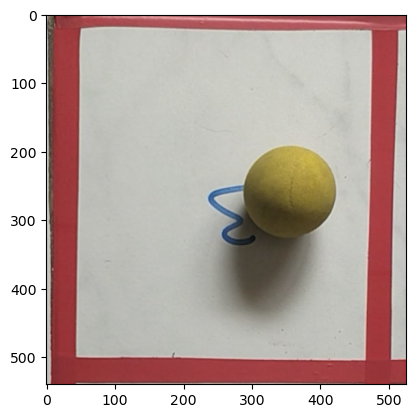